In [98]:
import pandas as pd
import numpy as np

In [99]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [100]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [101]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='median_house_value', ylabel='Count'>

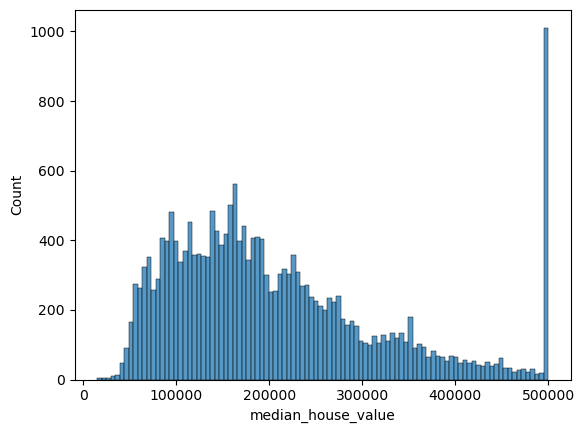

In [103]:
sns.histplot(df.median_house_value, bins =100)

In [104]:
median_house_value_logs = np.log1p(df.median_house_value)

<Axes: xlabel='median_house_value', ylabel='Count'>

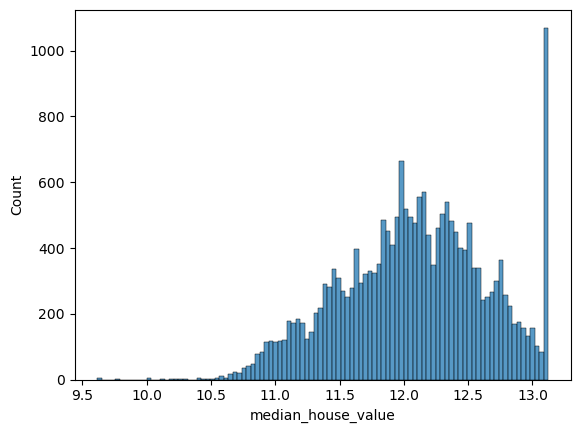

In [105]:
sns.histplot(median_house_value_logs, bins =100)

In [106]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [107]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [108]:
df_filter = df[(df.ocean_proximity=='INLAND')| (df.ocean_proximity=='<1H OCEAN')]
df_filter.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [109]:
del df_filter['ocean_proximity']
#df_filter.drop('ocean_proximity', inplace=True, axis=1)
df_filter.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


Q1: There's one feature with missing values. What is it?


In [110]:
df_filter.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Q2: What's the median (50% percentile) for variable 'population'?

In [111]:
df_filter.population.median()

1195.0

Prepare and split the dataset

    Shuffle the dataset (the filtered one you created above), use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [112]:
n = len(df_filter)
n


15687

In [113]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [114]:
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_test

n_train + n_val + n_test

15687

In [115]:
df_train = df_filter.iloc[idx[:n_train]]
df_val = df_filter.iloc[idx[n_train: n_train+n_test]]
df_test = df_filter.iloc[idx[n_train+n_test:]]

len(df_train) + len(df_val) +len(df_test)

15687

In [116]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [117]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Question 3


We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

Options:

With 0
With mean
Both are equally good

Option1: Fill missing values with zero

In [133]:
X_train = df_train.fillna(0)
X_val = df_val.fillna(0)
X_test = df_test.fillna(0)

In [134]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [135]:
X_train.values

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1913e+02,  3.6130e+01,  2.8000e+01, ...,  1.4340e+03,
         3.7100e+02,  2.0586e+00],
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00]])

In [141]:
w0, W = train_linear_regression(X_train.values, y_train)

In [143]:
y_pred = w0 + X_val.dot(W)

In [140]:
def rmse(y, y_pred):
    return np.sqrt(((y-y_pred)**2).mean())

In [152]:
err = rmse(y_val, y_pred)
err = round(err,2)

Option2: Fill missing value with mean

In [138]:
mean_total_bedrooms = df_train['total_bedrooms'].mean()
X_train1 = df_train.fillna(mean_total_bedrooms)
X_val1 = df_val.fillna(mean_total_bedrooms)
X_test1 = df_test.fillna(mean_total_bedrooms)


In [146]:
w0_mean, W_mean = train_linear_regression(X_train1.values, y_train)

In [147]:
y_pred_mean = w0_mean + X_val.dot(W_mean)

'''
Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.
'''


In [151]:
err_mean = round(rmse(y_val, y_pred_mean),2)

In [154]:
err, err_mean

(0.34, 0.34)

In [155]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [156]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, W = train_linear_regression_reg(X_train,y_train,r)
    y_pred = w0 + X_val.dot(W)
    err = round(rmse(y_val, y_pred),2)
    print(r, err)


0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.35
10 0.35



Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))


In [163]:
def lin_reg_model(X, seed):
    n = len(X);
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    n_test = n - n_train - n_val

    df_train = X.iloc[idx[:n_train]]
    df_val = X.iloc[idx[n_train:n_train+n_val]]
    df_test = X.iloc[idx[n_train+n_val:]]

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    df_train.total_bedrooms.fillna(0, inplace=True)
    df_val.total_bedrooms.fillna(0, inplace=True)
    df_test.total_bedrooms.fillna(0, inplace=True)

    w0, W = train_linear_regression(df_train.values,y_train)
    y_pred = w0 + df_val.dot(W)
    rmse_value = rmse(y_val, y_pred)

    return rmse_value




    




In [168]:
score = []
for i,seed in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    rmse_value = lin_reg_model(df_filter, seed)
    score.append(rmse_value)
    print (seed, score[i])

0 0.33778461152108236
1 0.3378066543009299
2 0.3384604473188178
3 0.3320086319057813
4 0.3394449206960269
5 0.34337807814846283
6 0.33853387112813416
7 0.34814297152954615
8 0.3512727798516247
9 0.3341662373171238


/tmp/ipykernel_1726/123023.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.total_bedrooms.fillna(0, inplace=True)
/tmp/ipykernel_1726/123023.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.total_bedrooms.fillna(0, inplace=True)
/tmp/ipykernel_1726/123023.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.total_bedrooms.fillna(0, inplace=True)


In [169]:
np.std(score)

0.005631486961458081

```
Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
```

In [173]:


n = len(df_filter)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

df_train = df_filter.iloc[idx[:n_train]]
df_val = df_filter.iloc[idx[n_train:n_train+n_val]]
df_test = df_filter.iloc[idx[n_train+n_val:]]



In [174]:
df_full_train = pd.concat([df_train, df_val])

In [175]:
y_full_train = np.log1p(df_full_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_full_train['median_house_value']
del df_test['median_house_value']

df_full_train.total_bedrooms.fillna(0, inplace=True)
df_test.total_bedrooms.fillna(0, inplace=True)

In [176]:
w0, W = train_linear_regression_reg(df_full_train.values,y_full_train)
y_pred = w0 + df_test.dot(W)
rmse_value = rmse(y_test, y_pred)